# ***Vamos Utilizar o Google Earth Engine?***



1.   Caso você não possua cadastro, faça em - [Cadastro](https://earthengine.google.com/signup/)
2.   Você pode acessar mais informações sobre como utlizar o Google Earth Engine em - [Guia do GEE](https://developers.google.com/earth-engine/guides/getstarted)

O objetivo do ***Earth Engine*** é:

- Realizar desenvolvimento de algoritmos altamente interativos em escala global

- Permitir processos big data em sensoriamento remoto

- Habilitar ciência de alto impacto e orientada por dados

- Permitir a progressão de desafios globais que envolvem grandes conjuntos de dados geoespaciais

### Componentes:

Os principais componentes do Earth Engine são:

- [**Datasets**](https://developers.google.com/earth-engine/datasets/): um arquivo em escala de petabytes de imagens de sensoriamento remoto e outros dados disponíveis publicamente. Explore o catálogo de dados.

- [**Google Earth Engine: Planetary-scale geospatial analysis for everyone**](https://reader.elsevier.com/reader/sd/pii/S0034425717302900?token=2AC58EA43ED5306A13DA0E6AF50A5F286D59B455B45F52F9932FE71845E5C75C706C78E079BC3769B23B256612A225D0): infra-estrutura computacional do Google otimizada para o processamento paralelo de dados geoespaciais.

- **APIs**: APIs para JavaScript e Python (hospedadas no GitHub) para fazer solicitações aos servidores do Earth Engine. Esses documentos se concentram em JavaScript; (Guia de introdução à API Javascript). Para Python, consulte o guia de instalação do Python e os exemplos do Python no repositório GitHub do Earth Engine.

- **Code Editor**: Um Ambiente de Desenvolvimento Integrado (IDE) online para prototipagem rápida e visualização de análises espaciais complexas usando a API Javascript. Explore os documentos do Editor de código.



# ***Nossos primeiros passos no GEE!!!***

A API do Python do Earth Engine e as ferramentas de linha de comando podem ser instaladas usando a ferramenta de instalação do pacote pip do Python.

Lembre-se de utilizar -> ***!***: A seguinte linha do notebook começa com ! para indicar que um comando shell deve ser invocado.

In [ ]:
##Instalando o GEE
!pip install -q earthengine-api
!pip install -q geemap==0.16.0

Montando o Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


Depois de ter autorizado o acesso (é necessária apenas a autenticação do Earth Engine). Inicialize sua conexão conforme mostrado na célula abaixo.

In [ ]:
# Importe a API do Earth Engine e inicialize-a.
import ee
import geemap 
ee.Authenticate()
ee.Initialize()

# ***Vamos revisar alguns conceitos.***

Primeiro vamos entender alguns conceitos básicos sobre "jargões" do GEE que vocês precisam saber. 

No GEE trabalhamos com ***Image, Image Collection, Feature, FeatureCollection, Geometry (Polygon, Point, line...)*** e métodos e objetos definidos. 

Veja abaixo um exemplo.

- **assetID**: é a chave para identificar um arquivo específico em [conjuntos de dados GEE](https://developers.google.com/earth-engine/datasets/catalog/USGS_SRTMGL1_003).
- **ee.Image('assetID')**: No GEE os dados raster são representados como objetos Image (veja o próximo tópico).
- **ee.Image.clip(ee.Geometry.____)**: É um método ee.Image usado para recortar espacialmente todas as bandas em Imagens.
- **folium**: ponte entre Python e [Leaflet](https://leafletjs.com/)

Vamos visualizar o que cada item mencionado anteriormente?

1. Image
2. Image Collection
3. Feature
4. Feature Collection
5. Geometry
6. Números
7. Strings

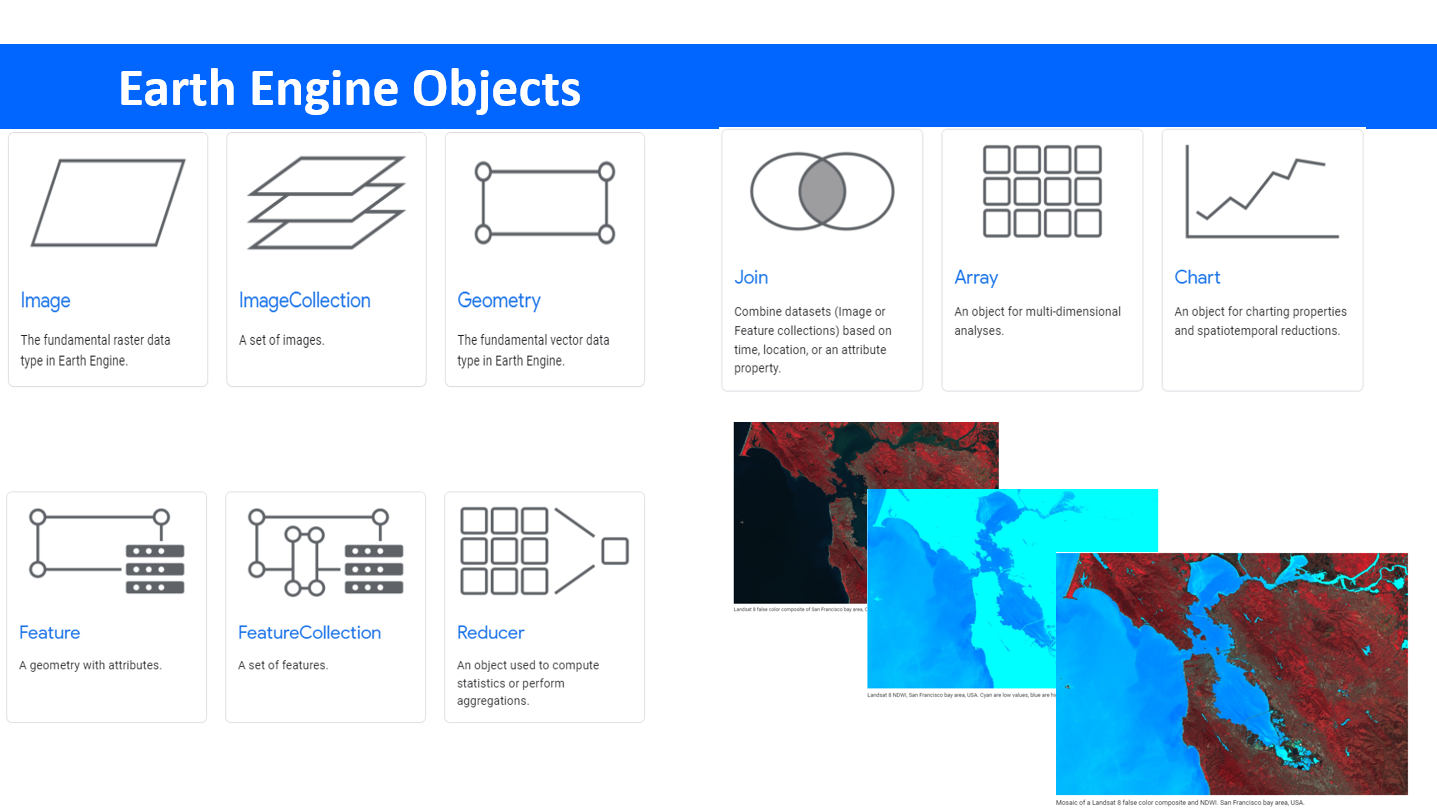


# ***Vamos dar o Start no mundo do Google Earth Engine no Python!***

1. Vamos abrir nossa primeira imagem? 
2. Vamos extrair alguns informações?
3. Vamos exportar esse dados para nosso drive?

In [ ]:
#Roi
roi = ee.Geometry.Polygon(
        [[[-51.31188826592861, -29.92798789164404],
          [-51.31188826592861, -30.095659800460687],
          [-51.072248983702046, -30.095659800460687],
          [-51.072248983702046, -29.92798789164404]]], None, False)

##Agora vamos obter um ee.Image de um ee.ImageCollection
image = ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")\
                                .filterBounds(roi)\
                                .filterDate('2020-01-01','2020-12-31')\
                                .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE',1))\
                                .sort('CLOUDY_PIXEL_PERCENTAGE')
 ## Print da quantidade de imagens                           
print('Qtd', image.size().getInfo())

Qtd 23


In [ ]:
##Pegar a imagem com menor % de nuvens
image_cloud = image.first()

In [ ]:
# Obtenha uma lista de todas as propriedades de metadados.
print(image_cloud.propertyNames().getInfo())

['system:version', 'system:id', 'DATATAKE_IDENTIFIER', 'AOT_RETRIEVAL_ACCURACY', 'SPACECRAFT_NAME', 'SATURATED_DEFECTIVE_PIXEL_PERCENTAGE', 'MEAN_INCIDENCE_AZIMUTH_ANGLE_B8A', 'CLOUD_SHADOW_PERCENTAGE', 'MEAN_SOLAR_AZIMUTH_ANGLE', 'system:footprint', 'VEGETATION_PERCENTAGE', 'SOLAR_IRRADIANCE_B12', 'SOLAR_IRRADIANCE_B10', 'SENSOR_QUALITY', 'SOLAR_IRRADIANCE_B11', 'GENERATION_TIME', 'SOLAR_IRRADIANCE_B8A', 'FORMAT_CORRECTNESS', 'CLOUD_COVERAGE_ASSESSMENT', 'THIN_CIRRUS_PERCENTAGE', 'system:time_end', 'WATER_VAPOUR_RETRIEVAL_ACCURACY', 'system:time_start', 'DATASTRIP_ID', 'PROCESSING_BASELINE', 'SENSING_ORBIT_NUMBER', 'NODATA_PIXEL_PERCENTAGE', 'SENSING_ORBIT_DIRECTION', 'GENERAL_QUALITY', 'GRANULE_ID', 'REFLECTANCE_CONVERSION_CORRECTION', 'MEDIUM_PROBA_CLOUDS_PERCENTAGE', 'MEAN_INCIDENCE_AZIMUTH_ANGLE_B8', 'DATATAKE_TYPE', 'MEAN_INCIDENCE_AZIMUTH_ANGLE_B9', 'MEAN_INCIDENCE_AZIMUTH_ANGLE_B6', 'MEAN_INCIDENCE_AZIMUTH_ANGLE_B7', 'MEAN_INCIDENCE_AZIMUTH_ANGLE_B4', 'MEAN_INCIDENCE_ZENITH_ANG

In [ ]:
##Antes de abrir a imagem, vamos conhecer o ID dessa imagem
print(image_cloud.get('system:id').getInfo())

COPERNICUS/S2_SR_HARMONIZED/20200308T133219_20200308T133949_T22JDM


In [ ]:
## Extrair uma propriedade especifica 
print(image_cloud.get('CLOUDY_PIXEL_PERCENTAGE').getInfo())

0.046473


In [ ]:
# Obtenha informações sobre as bandas como uma lista.
bands = image_cloud.bandNames()
print('bands',bands.getInfo())

bands ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12', 'AOT', 'WVP', 'SCL', 'TCI_R', 'TCI_G', 'TCI_B', 'MSK_CLDPRB', 'MSK_SNWPRB', 'QA10', 'QA20', 'QA60']


In [ ]:
# Obtenha informações de projeção da banda 1.
projection = image_cloud.select('B8').projection()
print(projection.getInfo())

{'type': 'Projection', 'crs': 'EPSG:32722', 'transform': [10, 0, 399960, 0, -10, 6700000]}


In [ ]:
# Obtém informações de escala (em metros) da banda 1
print('escala',projection.nominalScale().getInfo())

escala 10


A API do Python, diferente do Editor de Código, não oferece suporte à visualização interativa (**Map.addLayer**). Para obter os efeitos de visualização desejáveis, você pode usar o GEEMAP.

In [ ]:
# ##Abrindo nosso mapa
# # Defina um método para exibir blocos de imagens do Earth Engine em um folium map
Map = geemap.Map()
# ##Centralizando a imagem
Map = geemap.Map(location=[-30.095659800460687,-51.31188826592861,], zoom_start= 10)
# #Para ver uma visualização de satélite do Google como um mapa base
# Map.add_basemap('HYBRID')

##Obtendo a imagem
Map.addLayer(image_cloud.clip(roi),{'bands':['B4','B3','B2'],'min':0, 'max':2839}, 'Image RGB')

# ##Adicionando a feature  = Converte para Image (desenha o limite)
limite = ee.Image().paint(roi, 0, 2)
Map.addLayer(limite,{'palette':'red'}, 'ROI')

# ##Visualizar o mapa
display(Map)

Map(center=[-30.095659800460687, -51.31188826592861], controls=(WidgetControl(options=['position', 'transparen…

In [ ]:
##Exportando os dados
task = ee.batch.Export.image.toDrive(image=image_cloud.select(["B.*"]),  # um objeto ee.Image.
                                     region=roi,  # um objeto ee.Geometry.
                                     description='Sentinel2_python',
                                     folder='SEIBAHIA',
                                     fileNamePrefix='Sentinel2_python',
                                     scale=20,
                                     maxPixels=1e13,
                                     crs='EPSG:4326')
##Inicie o Download
task.start()

In [ ]:
##Verifique o status
task.status()

{'state': 'RUNNING',
 'description': 'Sentinel2_python',
 'creation_timestamp_ms': 1663851760283,
 'update_timestamp_ms': 1663851771017,
 'start_timestamp_ms': 1663851764880,
 'task_type': 'EXPORT_IMAGE',
 'attempt': 1,
 'id': '7KSLTOORTC4SNPEB5GFKNHZS',
 'name': 'projects/earthengine-legacy/operations/7KSLTOORTC4SNPEB5GFKNHZS'}